## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from py2neo import Graph, Node, Relationship, Database
from karateclub import DeepWalk, Walklets, GraphReader
import networkx as nx
from collections import defaultdict
from pyprind import ProgBar
import pyprind
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

## Read In Wikipedia Graph

In [2]:
wiki_graph_data = pd.read_csv('wiki_data_extra_small.tsv', sep='\t')

In [3]:
wiki_graph_data.head()

,source,target,depth
0,covid-19 pandemic,coronavirus disease 2019,1
1,covid-19 pandemic,emerging infectious disease,1
2,covid-19 pandemic,globalisation and disease,1
3,black lives matter,black identity extremists,1
4,black lives matter,black twitter,1


In [4]:
wiki_graph_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2048 entries, 0 to 2047
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  2048 non-null   object
 1   target  2048 non-null   object
 2   depth   2048 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 48.1+ KB


## Building the Graph

In [5]:
wiki_graph = nx.from_pandas_edgelist(wiki_graph_data, "source", "target", create_using=nx.Graph())

In [6]:
wiki_graph.number_of_nodes()

1635

In [7]:
wiki_graph.adj

AdjacencyView({'covid-19 pandemic': {'coronavirus disease 2019': {}, 'emerging infectious disease': {}, 'globalisation and disease': {}, 'pandemic': {}}, 'coronavirus disease 2019': {'covid-19 pandemic': {}, 'coronavirus disease': {}, 'coronavirus recession': {}, 'decoding covid-19': {}, 'pbs': {}, 'disease x': {}, 'li wenliang': {}}, 'emerging infectious disease': {'covid-19 pandemic': {}, 'disease x': {}, 'epidemiological transition': {}, 'globalization and disease': {}, 'pandemic prevention': {}}, 'globalisation and disease': {'covid-19 pandemic': {}, 'chagas disease': {}, 'eradication of infectious diseases': {}, 'global catastrophic risk': {}, 'infectious disease': {}, 'pandemic': {}, 'transmission (medicine)': {}, 'tropical disease': {}, 'virgin soil epidemic': {}, 'wildlife smuggling and zoonoses': {}}, 'black lives matter': {'black identity extremists': {}, 'black twitter': {}, 'civil rights movement': {}, 'de-escalation': {}, 'h.r. 40 - commission to study and develop reparati

In [8]:
wiki_graph.nodes

NodeView(('covid-19 pandemic', 'coronavirus disease 2019', 'emerging infectious disease', 'globalisation and disease', 'black lives matter', 'black identity extremists', 'black twitter', 'civil rights movement', 'de-escalation', 'h.r. 40 - commission to study and develop reparation proposals for african-americans act', 'racial capitalism', 'racism in the united states', 'reparations for slavery', 'sayhername', 'taking a stand in baton rouge', 'the hate u give', 'the hate u give (film)', 'the personal is political', 'identity politics', 'woke', 'democratic party (united states)', 'democratic party (united states) organizations', 'political party strength in u.s. states', 'politics of the united states', 'republican party (united states)', 'factions in the republican party', 'republican in name only', 'south park republican', 'conservatism in the united states', 'factions in the republican party (united states)', 'horseshoe theory', 'libertarian conservatism', 'libertarianism in the unit

In [9]:
mapping = {title: index for index, title in enumerate(list(wiki_graph.nodes), start=0)}

In [10]:
wiki_graph_ints = nx.relabel.relabel_nodes(wiki_graph, mapping)

## Learning the Graph Embedding

In [11]:
deep_walk = DeepWalk()
deep_walk.fit(wiki_graph_ints)

In [12]:
def get_embedding_vector(model, mapping, article_name):
    
    embedding_matrix = model.get_embedding()
    try:
        index = mapping[article_name]
        return embedding_matrix[index]
    except:
        return None

## Visualizing the Graph Embedding

In [15]:
def plot_words(model, word_list):
    
    embedding_matrix = model.get_embedding()
    pca = PCA(n_components=2)
    proj = pca.fit_transform(embedding_matrix)
    proj = 100*proj
    plt.figure(figsize=(10,10))
    # create a scatter plot of the projection
    plt.scatter(proj[:, 0], proj[:, 1])
    for i, word in enumerate(word_list[:50]):
        plt.annotate(word, xy=(proj[i, 0], proj[i, 1]))
        
    plt.show()

<IPython.core.display.Javascript object>


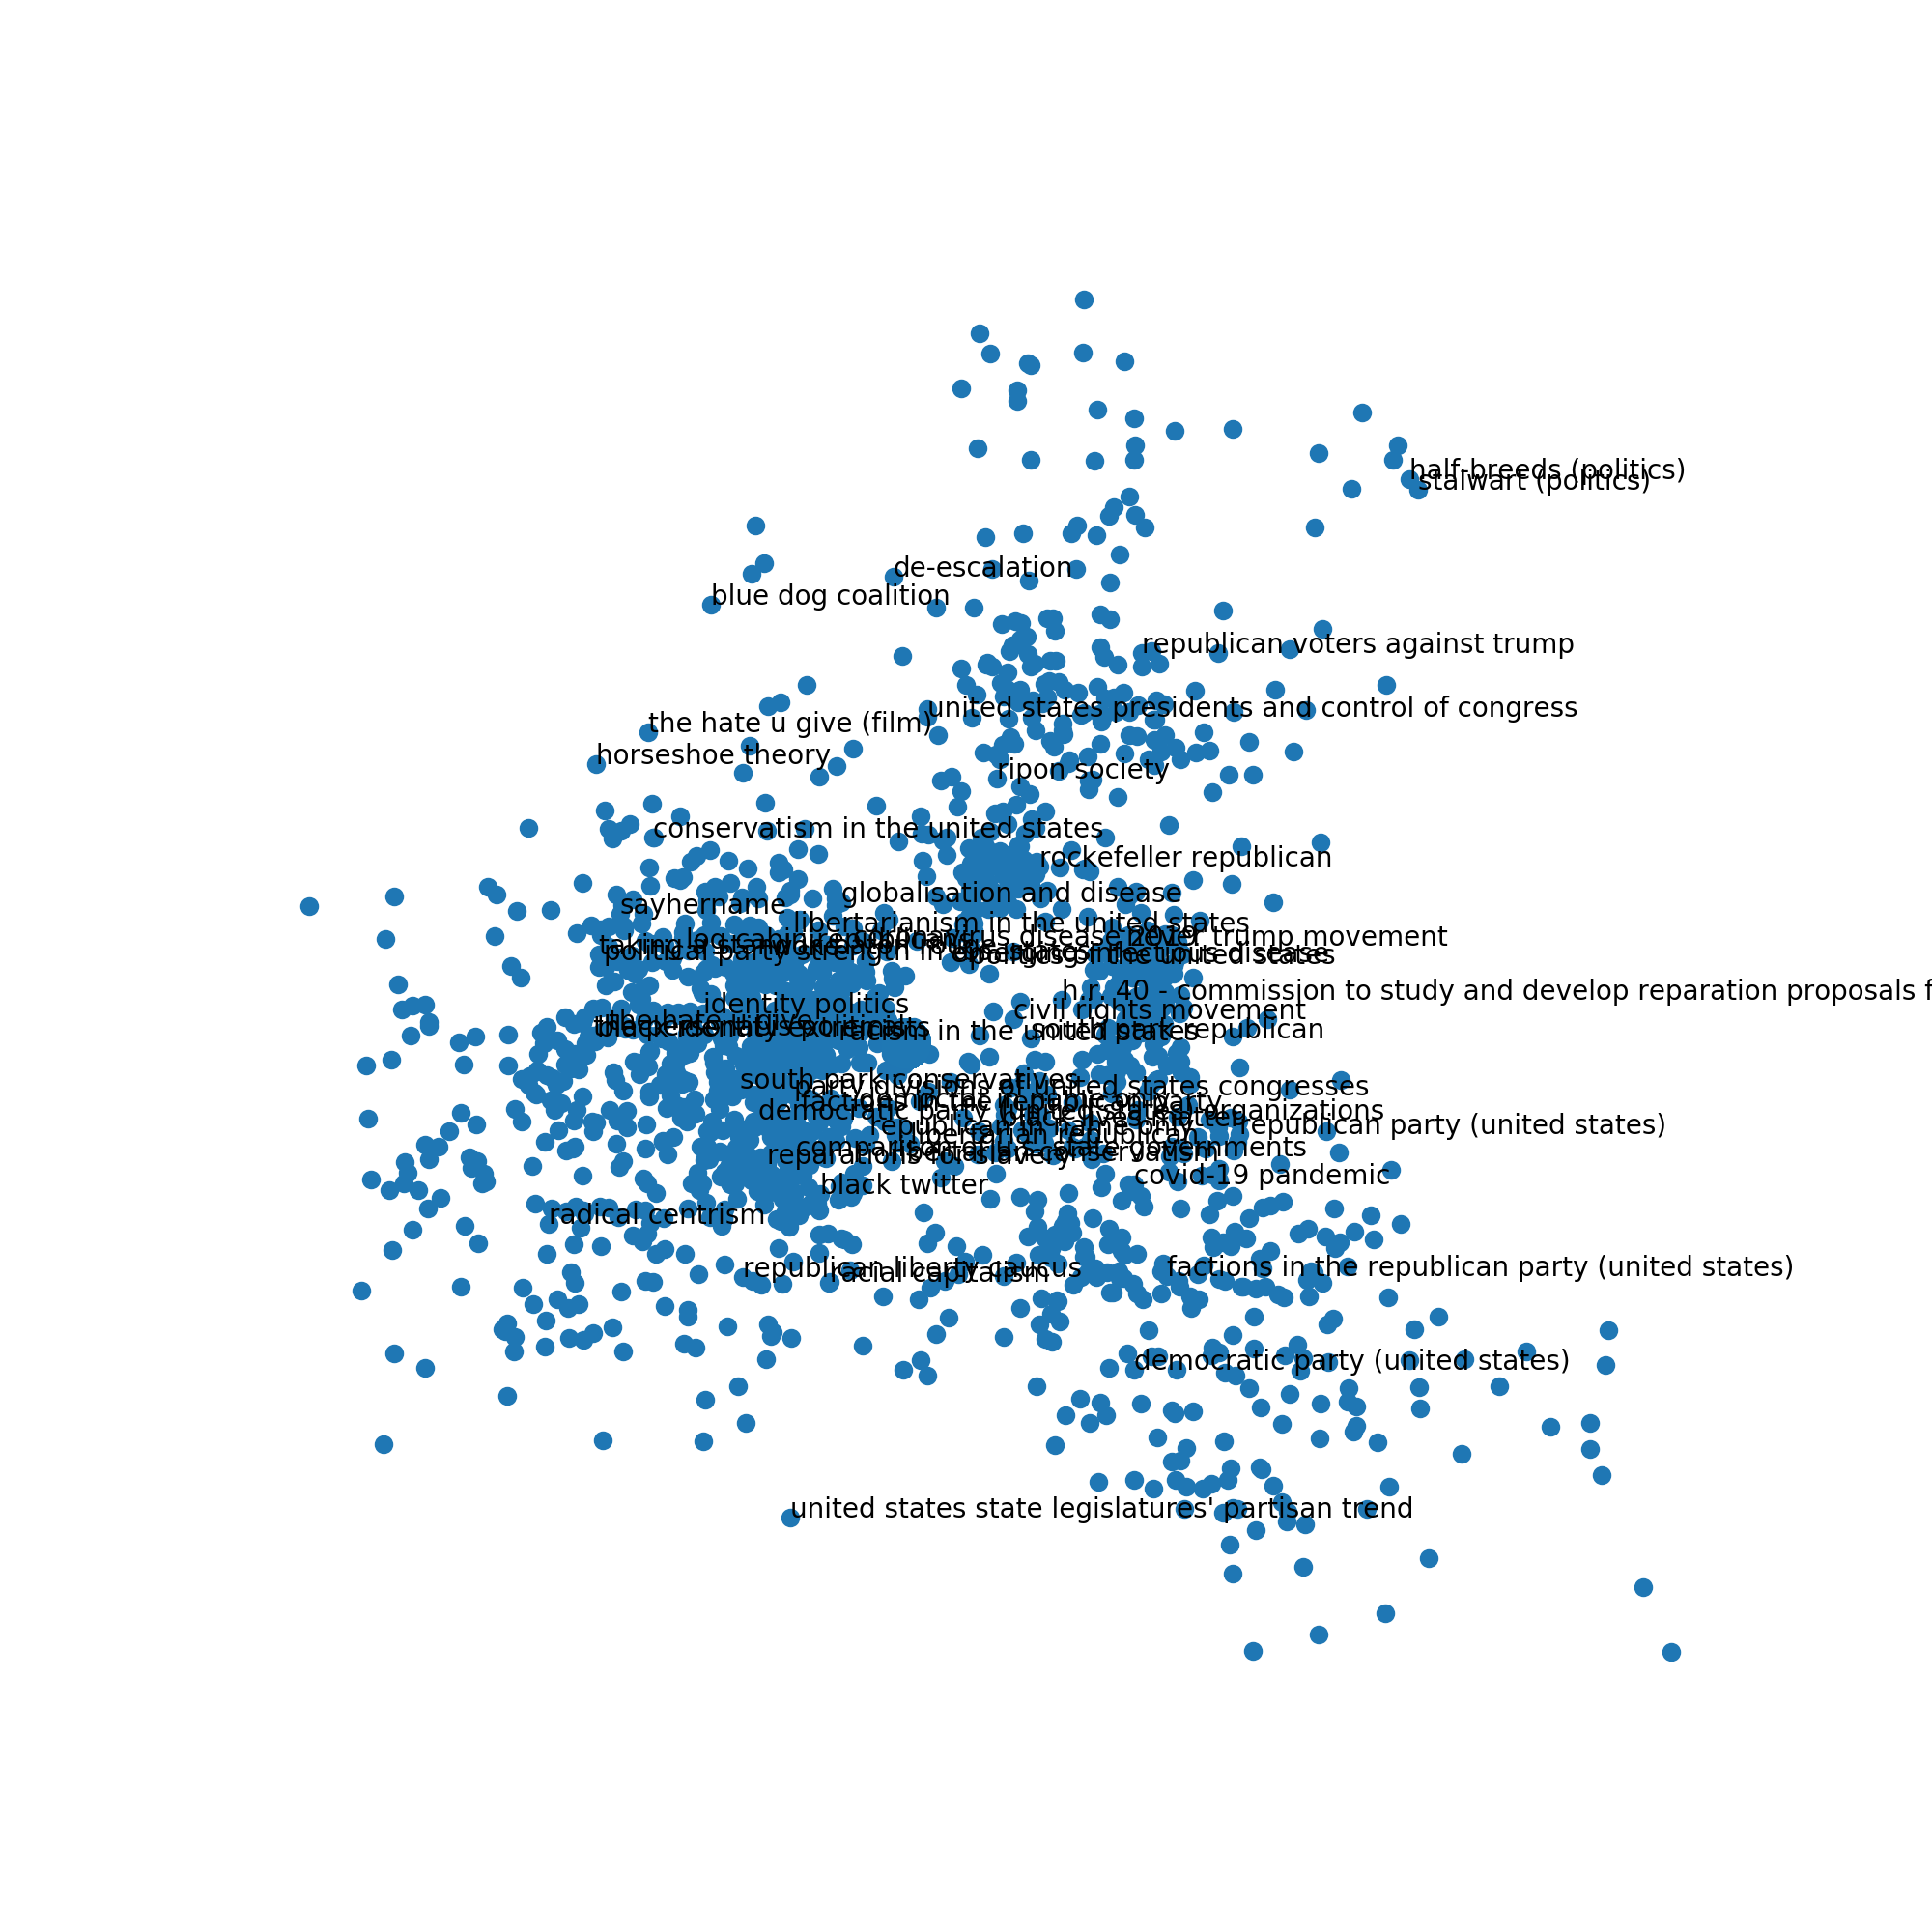

In [16]:
import mpld3
mpld3.enable_notebook()
word_list = list(wiki_graph.nodes)
plot_words(deep_walk, word_list)

In [18]:
nx.draw(wiki_graph)